# Lab 14: K Nearest Neighbors

In [1]:
# Don't change this cell; just run it. 
import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.simplefilter('ignore', FutureWarning)

import otter
grader = otter.Notebook()

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

This assignment is due by **11:59pm on the due date listed in Canvas**. Start early so that you can come to office hours if you're stuck. Check Canvas for the office hours schedule. Late work will not be accepted as per the policies described in the Canvas syllabus. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

## Diabetes classification

An exceptionally useful application of classification methods is the identification of individuals at high risk of certains illnesses/diseases. Physicians use software that implement such algorithms to help guide their evaluation of their patients, as classification models can use multivariate information in ways that are difficult for the human brain to account for. 

Here we'll use only two variables, blood glucose and blood pressure, to classify an individual as having diabetes or not. 

In [2]:
# Read in the data
db = pd.read_csv("diabetes.csv")
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Question 1

Plot the relationship between Glucose and BloodPressure. Change the color of the points by "Outcome".

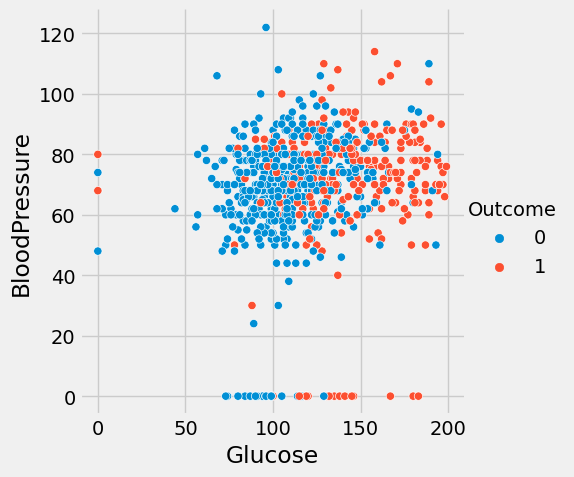

In [3]:
sns.relplot(x='Glucose', y='BloodPressure', data=db, hue = 'Outcome')

#### Question 2

Many of the individuals in the data have a systolic blood pressure of 0! It is doubtful that these individuals have diabetes, so remove these points from the data. 

In [4]:
db_clean = db[db['BloodPressure'] != 0]

In [5]:
grader.check("q1_2")

q1_2 results: All test cases passed!

Our eventual goal is to classify a new observation as either outcome 0 (no diabetes) or outcome 1 (diabetes). The first step in doing this is to define a function that will calculate the Euclidian distance between two points. 

#### Question 3

Define the function `distance` that takes two arguments, each a row from a DataFrame. The function should convert each row to a numpy array and then calculate the distance between the points. Remember that the distance between 2 points with 2 variables is

$$dist = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} $$

though your function should be able to find the distance between two points with any number of variables.

In [6]:
def distance(arr1, arr2):
    arr1 = np.array(arr1)
    arr2 = np.array(arr2)
    return np.sqrt(np.sum((arr1 - arr2)**2))


distance(db_clean.iloc[0,:], db_clean.iloc[1,:])

66.91095706982526

In [7]:
grader.check("q1_3")

q1_3 results: All test cases passed!

#### Question 4

Calculate the distance between the point (x = 150,y = 60) and every other point in the `db_clean` using your distance function and save the output in an array called `distances`. You should only be calculating the distance using the two variables we plotted: x = `Glocose` and y = `BloodPressure` **in that order**.

In [8]:
# We'll reset the index to ensure our row indices add up to the length of our DataFrame.
db_clean = db_clean.reset_index()

In [9]:
distances = np.empty(0)

for i in np.arange(np.array(db_clean['Glucose']).size):
    new_point = [150, 60]
    result = distance(db_clean.iloc[i,2:4], new_point)
    distances = np.append(distances, result)

db_clean["distances"] = distances
db_clean.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,distances
0,0,6,148,72,35,0,33.6,0.627,50,1,12.165525
1,1,1,85,66,29,0,26.6,0.351,31,0,65.276336
2,2,8,183,64,0,0,23.3,0.672,32,1,33.241540
3,3,1,89,66,23,94,28.1,0.167,21,0,61.294372
4,4,0,137,40,35,168,43.1,2.288,33,1,23.853721


In [10]:
grader.check("q1_4")

q1_4 results: All test cases passed!

#### Question 5

We're going to classify our new point using the 7 nearest neighbors. Identify the 7 closest points, count the `Outcome`s and, assign either 0 or 1 as the classification for our new point. 

In [11]:
neighbors = db_clean.sort_values('distances', ascending=True).reset_index().iloc[0:7,10:12]

new_class7 = 0


In [12]:
grader.check("q1_5")

q1_5 results: All test cases passed!

#### Question 6

By finding the class of the 7 nearest points and counting them, we were able to take a reasonable guess at the class of our newest point! In what ranges of x and y values to you expect our classifications to be most accurate, and what ranges do you expect the accuracy to approach 0.5, or a random guess. You can reference the figure you made above and/or try looking at the `Outcome` counts of different points to answer the question.

The range of x and y values that would be most accurate would be the ones closest in distance to the original point.

By classifying individuals in this way, we can identify patients that are at higher or lower risk of certain morbidities. This allows for proactive measures from the patient's physician, potentially improving their quality of care.

You're done with Lab 14! Be sure to run the tests and verify that they all pass, then **Save** your changes, then **Download** your file to your host machine (if you are using jupyterhub), then submit your file to the Lab 14 assignment in **Canvas** by 11:59pm on the due date.